# A) API Zugriff im lokalen Netzwerk 

# A) Das sind die Inhalte:
## Sensor- Werte auslesen und speichern
1. request an das REST API senden und "return-object" analysieren
2. dictionary mit json.loads aus dem "return-object" erzeugen
3. dekodierte Sensor - Messwerte mit "print" ausgeben
4. Messwerte als .json file ablegen
5. Messwerte fortlaufend in einem .db file mitschreiben

# B) Das ist dein Arbeitsauftrag: 
## ->Arbeitsaufgabe 1: "Dummy - Werte speichern"

### Abgabe als Link zu deinem Github repository: 
1. initialisiere ein neues .git repository und lege das "b_nachname_dummy_source" - file darin ab. Der Source-Code soll nur die notwendigen Bestandteile enthalten, um das geforderte .json und .db file anzulegen. Bitte kommentiere den Source-Code und alle individuellen Anpassungen! Füge einen Screenshot des erzeugten JSON - Files und einen Screenshot der geöffneten Tabelle (z.B. in DB - Browser) genau dort ein, wo sie im Source-Code erzeugt werden.
2. speichere die individuell angepassten dummy - Werte in einem .json File "b_nachname_dummywerte.json"
3. speichere die individuell angepassten dummy - Werte in einer sqlite Datenbank "b_nachname_dummywerte.db"
4. füge das .json und .db file deinem git repository hinzu und führe ein commit durch. "-m "Arbeitsaufgabe Teil 1 Nachname"

## ->Arbeitsaufgabe 2: "Sensor - Werte speichern"
Das Abfrageintervall ist eine Minute. Die Dauer der Aufzeichnung ist vor dem Start der Aufzeichnung
individuell mit dem Lehrer zu vereinbaren.

### TODO: *Ersetze die "dummy-Werte" durch echte Sensordaten. Speichere die Werte für Luftfeuchtigkeit, Temperatur und Helligkeit:*
### Abgabe als Link zu deinem Github repository: 
1. initialisiere ein neues .git repository und lege das "source" - file darin ab. Der Source-Code soll im Unterschied zu Arbeitsaufgabe 1 alle Code-Bestandteile von A1) bis A5) in ausgeführter Form beinhalten und zusätzlich die erforderlichen individuellen Anpassungen inkl. deiner Kommentare. Bitte füge einen Screenshot des erzeugten JSON - Files und einen Screenshot der geöffneten Tabelle (z.B. in DB - Browser) genau dort ein, wo sie im Source-Code erzeugt werden.
2. speichere die Sensor - Werte in einem .json File "b_nachname_sensorwerte.json"
3. speichere die Sensor - Werte in einer sqlite Datenbank "b_nachname_sensorwerte.db"
4. füge das .json und .db file deinem git repository hinzu und führe ein commit durch. "-m "Arbeitsaufgabe Teil 2 Nachname"



 

# Input zu Arbeitsaufgabe 1 und 2
### ACHTUNG: Die dummy-Werte für Arbeitsaufgabe 1 müssen individuell z.B. mittels Zufallsgenerator erzeugt werden!
### A1) request an das REST API senden und "return-object" analysieren

In [30]:
import requests
import json
#Die Authentifizierung wird im lokalen Netzwerk noch nicht benötigt, aber im nächsten Schritt
#from requests.auth import HTTPBasicAuth


TODO: 1 Schritt: IP Adresse des Sensors identifizieren! Dazu das Programm "Advanced IP Scanner " installieren
um die IP - Adressen aller Computer im Netzwerk abzufragen. 
Um einen geeigente IP - Range festzulegen, cmd starten - eigene IP Adresse (am Kabel abfragen) und IP - 100 bis IP + 100 scannen. 
Das Gerät ist ein Raspberry Pi und sollte im NW anhand des Namens entsprechend erkannt werden. 

In [31]:
my_url = 'http://192.168.68.112:8080/rest/items/ZWaveNode019WohnzimmerZW100Multisensor6_Sensorrelativehumidity'

In [32]:
hum_value=requests.get(my_url)

In [33]:
type(hum_value)

requests.models.Response

In [ ]:
dir(hum_value)

In [35]:
hum_value.content

b'{"link":"http://192.168.68.112:8080/rest/items/ZWaveNode019WohnzimmerZW100Multisensor6_Sensorrelativehumidity","state":"54","stateDescription":{"pattern":"%.1f","readOnly":true,"options":[]},"editable":true,"type":"Number","name":"ZWaveNode019WohnzimmerZW100Multisensor6_Sensorrelativehumidity","label":"WZSensor (relative humidity)","category":"Humidity","tags":["Point"],"groupNames":[]}'

In [36]:
my_content=hum_value.content

In [37]:
print(type(my_content))
print(hum_value.encoding)

<class 'bytes'>
utf-8


### A2) dictionary mit json.loads aus dem "return-object" erzeugen

In [38]:
# json.loads requires the decoded bytestring (which is a string) as argument and returns a python dictionary
# .decode togethe with json.loads is optional
print(type(json.loads(my_content.decode("utf-8"))))
json.loads(my_content.decode("utf-8"))

<class 'dict'>


{'link': 'http://192.168.68.112:8080/rest/items/ZWaveNode019WohnzimmerZW100Multisensor6_Sensorrelativehumidity',
 'state': '54',
 'stateDescription': {'pattern': '%.1f', 'readOnly': True, 'options': []},
 'editable': True,
 'type': 'Number',
 'name': 'ZWaveNode019WohnzimmerZW100Multisensor6_Sensorrelativehumidity',
 'label': 'WZSensor (relative humidity)',
 'category': 'Humidity',
 'tags': ['Point'],
 'groupNames': []}

### A3) dekodierte Sensor - Messwerte mit "print" ausgeben

In [39]:
# The result - bytestring can be decoded and printed directly as a string without using json.loads , 
# however if you pass it as an argument into the "json-loads" function you can create a dictionary
print(type(my_content.decode()))
print(my_content.decode())

<class 'str'>
{"link":"http://192.168.68.112:8080/rest/items/ZWaveNode019WohnzimmerZW100Multisensor6_Sensorrelativehumidity","state":"54","stateDescription":{"pattern":"%.1f","readOnly":true,"options":[]},"editable":true,"type":"Number","name":"ZWaveNode019WohnzimmerZW100Multisensor6_Sensorrelativehumidity","label":"WZSensor (relative humidity)","category":"Humidity","tags":["Point"],"groupNames":[]}


### A4) Input Arbeitsaufgabe 1/ Messwerte als .json file speichern

https://docs.python.org/3/library/json.html
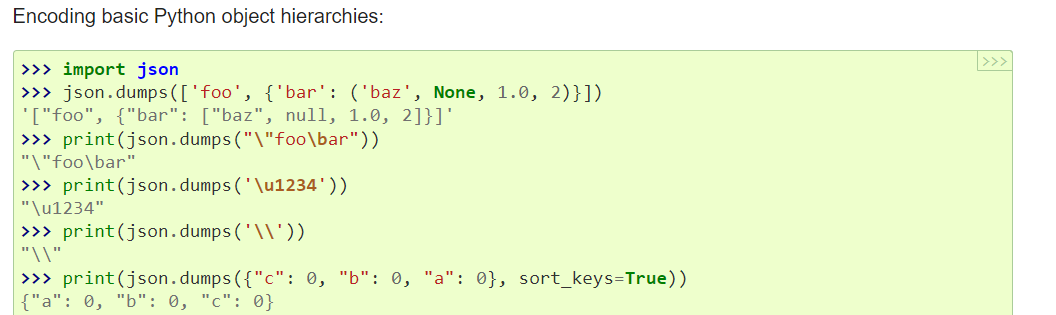

In [11]:
# in order to store the values as a json file, you might create and open a file, 
# continuously get the current sensor readings and finally store them in the json - file
# the code - snippet doesn't meet the requirements of the assignment in terms of time- interval, 
# sensor - readings, etc.

import time
import pandas as pd
my_values_df = pd.DataFrame(data=None,columns=['timestamp','temperature','humidity','brightness'])
my_timestamp = round(time.time())
for my_counter in range(10):
    time.sleep(1)
    my_timestamp = round(time.time())
    print(my_timestamp)
    hum_value = content_dict['state']
    act_temp = float(hum_value)
    act_hum = float(hum_value)
    act_bright = float(hum_value) 
    input_values = [my_timestamp,act_temp,act_hum,act_bright]
    my_values_df.loc[my_counter]=input_values

filename = "eamamsiugwudi_sensor_values"
with open(filename, 'w+') as jsonfile:
    my_values_df.to_json(jsonfile)
    

1683234827
1683234828
1683234829
1683234830
1683234831
1683234832
1683234833
1683234834
1683234835
1683234836


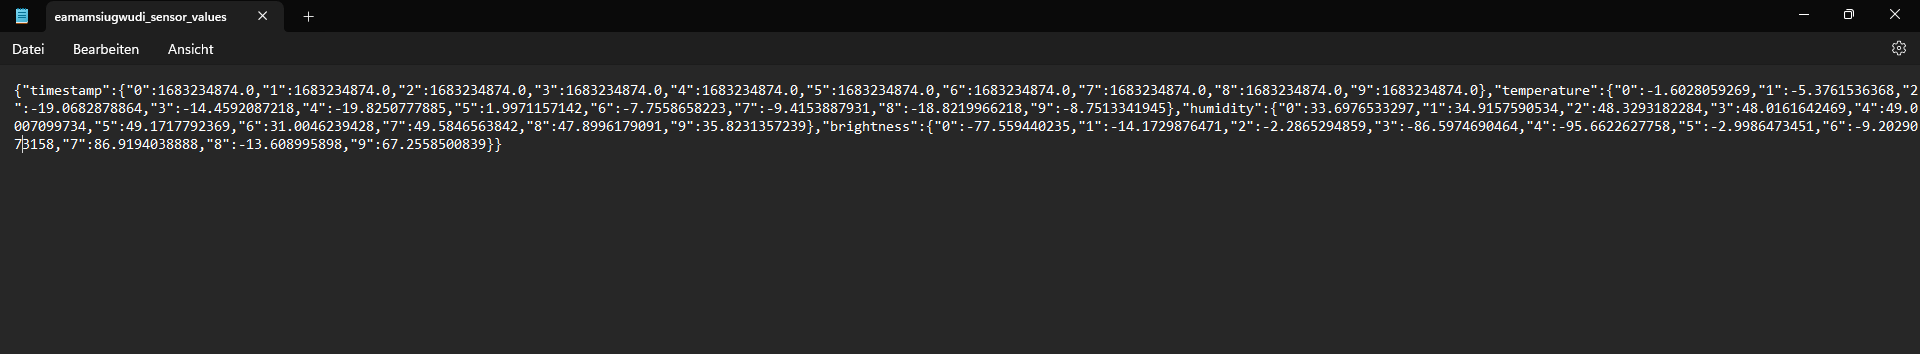

In [12]:
#retrieve values from .json file via 
pd.read_json(filename)

,timestamp,temperature,humidity,brightness
0,2023-05-04 21:13:47,50,50,50
1,2023-05-04 21:13:48,50,50,50
2,2023-05-04 21:13:49,50,50,50
3,2023-05-04 21:13:50,50,50,50
4,2023-05-04 21:13:51,50,50,50
5,2023-05-04 21:13:52,50,50,50
6,2023-05-04 21:13:53,50,50,50
7,2023-05-04 21:13:54,50,50,50
8,2023-05-04 21:13:55,50,50,50
9,2023-05-04 21:13:56,50,50,50


### A5) Input Arbeitsaufgabe 1/ Messwerte fortlaufend in einem .db file mitschreiben

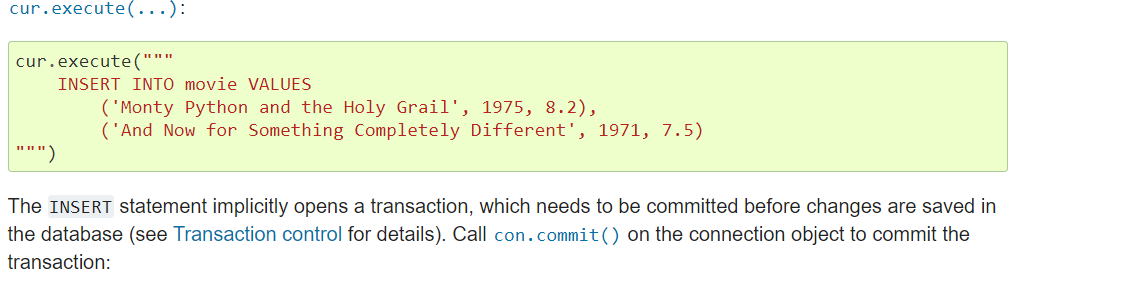

In [13]:
import pandas as pd
import random
import time
import sqlite3


my_values_df = pd.DataFrame(data=None,columns=['timestamp','temperature','humidity','brightness'])
#cnx = sqlite3.connect(':memory:') alternative in memory database
sqlite_db = 'eamamsiugwudi_sensor_values.sqlite3' # String for creating DB in specified directory
print(sqlite_db)

conn=sqlite3.connect(sqlite_db) # Creates sqlite Database - check in your file explorer
cur=conn.cursor()
cur.execute('''DROP TABLE IF EXISTS sensor_values''')
cur.execute('''CREATE TABLE sensor_values(timestamp NUMERIC,temperature NUMERIC, humidity NUMERIC, brightness NUMERIC);''')

for my_counter in range(10):
    time.sleep(0)
    my_timestamp = round(time.time())
    print(my_timestamp)
    act_temp = float(random.uniform(-20.0, 4.0))
    act_hum = float(random.uniform(30.0, 50.0))
    act_bright = float(random.uniform(-100.0, 100.0)) 
    input_values = [my_timestamp,act_temp,act_hum,act_bright]
    my_values_df.loc[my_counter]=input_values

# CREATE INSERT STATEMENT
    execution_string = f"INSERT INTO sensor_values VALUES ({my_timestamp}, {act_temp}, {act_hum}, {act_bright})"
    print(execution_string)
    cur.execute(execution_string)
    conn.commit()
    
filename = "eamamsiugwudi_sensor_values"
with open(filename, 'w+') as jsonfile:
    my_values_df.to_json(jsonfile)
pd.read_json(filename)

eamamsiugwudi_sensor_values.sqlite3
1683234874
INSERT INTO sensor_values VALUES (1683234874, -1.6028059268510688, 33.69765332970434, -77.55944023500604)
1683234874
INSERT INTO sensor_values VALUES (1683234874, -5.376153636812575, 34.91575905338829, -14.172987647116301)
1683234874
INSERT INTO sensor_values VALUES (1683234874, -19.068287886401475, 48.32931822844151, -2.2865294859447403)
1683234874
INSERT INTO sensor_values VALUES (1683234874, -14.459208721847087, 48.01616424693343, -86.59746904640721)
1683234874
INSERT INTO sensor_values VALUES (1683234874, -19.825077788508423, 49.00070997335902, -95.6622627758213)
1683234874
INSERT INTO sensor_values VALUES (1683234874, 1.9971157142451226, 49.17177923691081, -2.9986473450981634)
1683234874
INSERT INTO sensor_values VALUES (1683234874, -7.755865822286895, 31.004623942816668, -9.202907315810307)
1683234874
INSERT INTO sensor_values VALUES (1683234874, -9.415388793141869, 49.58465638419704, 86.91940388884282)
1683234874
INSERT INTO sensor_

,timestamp,temperature,humidity,brightness
0,2023-05-04 21:14:34,-1.602806,33.697653,-77.559440
1,2023-05-04 21:14:34,-5.376154,34.915759,-14.172988
2,2023-05-04 21:14:34,-19.068288,48.329318,-2.286529
3,2023-05-04 21:14:34,-14.459209,48.016164,-86.597469
4,2023-05-04 21:14:34,-19.825078,49.000710,-95.662263
5,2023-05-04 21:14:34,1.997116,49.171779,-2.998647
6,2023-05-04 21:14:34,-7.755866,31.004624,-9.202907
7,2023-05-04 21:14:34,-9.415389,49.584656,86.919404
8,2023-05-04 21:14:34,-18.821997,47.899618,-13.608996
9,2023-05-04 21:14:34,-8.751334,35.823136,67.255850


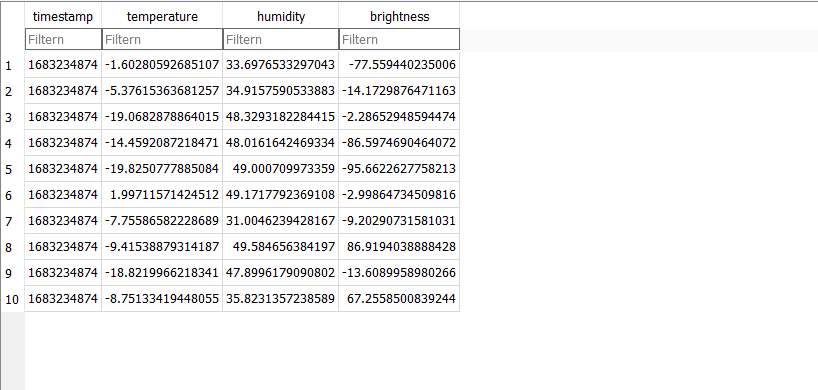

In [93]:
# fetch values directly from db cursor
cur.execute("SELECT * FROM sensor_values")
print(cur.fetchall())

[(1673132387, 45, 45, 45), (1673132388, 45, 45, 45), (1673132389, 45, 45, 45), (1673132390, 45, 45, 45), (1673132391, 45, 45, 45), (1673132392, 45, 45, 45), (1673132393, 45, 45, 45), (1673132394, 45, 45, 45), (1673132395, 45, 45, 45), (1673132396, 45, 45, 45)]


In [92]:
# retrieve values via pd library from local database
pd.read_sql("SELECT * FROM sensor_values;", conn)

,timestamp,temperature,humidity,brightness
0,1673132387,45,45,45
1,1673132388,45,45,45
2,1673132389,45,45,45
3,1673132390,45,45,45
4,1673132391,45,45,45
5,1673132392,45,45,45
6,1673132393,45,45,45
7,1673132394,45,45,45
8,1673132395,45,45,45
9,1673132396,45,45,45
